In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train = pd.read_csv('game_train.csv')
df_test = pd.read_csv('game_test.csv')
submission = pd.read_csv('game_sample_submission.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
1,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
2,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
3,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
4,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.00,0,0,0,96,1262,0,0,0.00,1316,squad-fpp,28,28,-1,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000


In [5]:
df_train[df_train.isnull().any(axis=1)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2172969,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [6]:
df_test[df_test.isnull().any(axis=1)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints


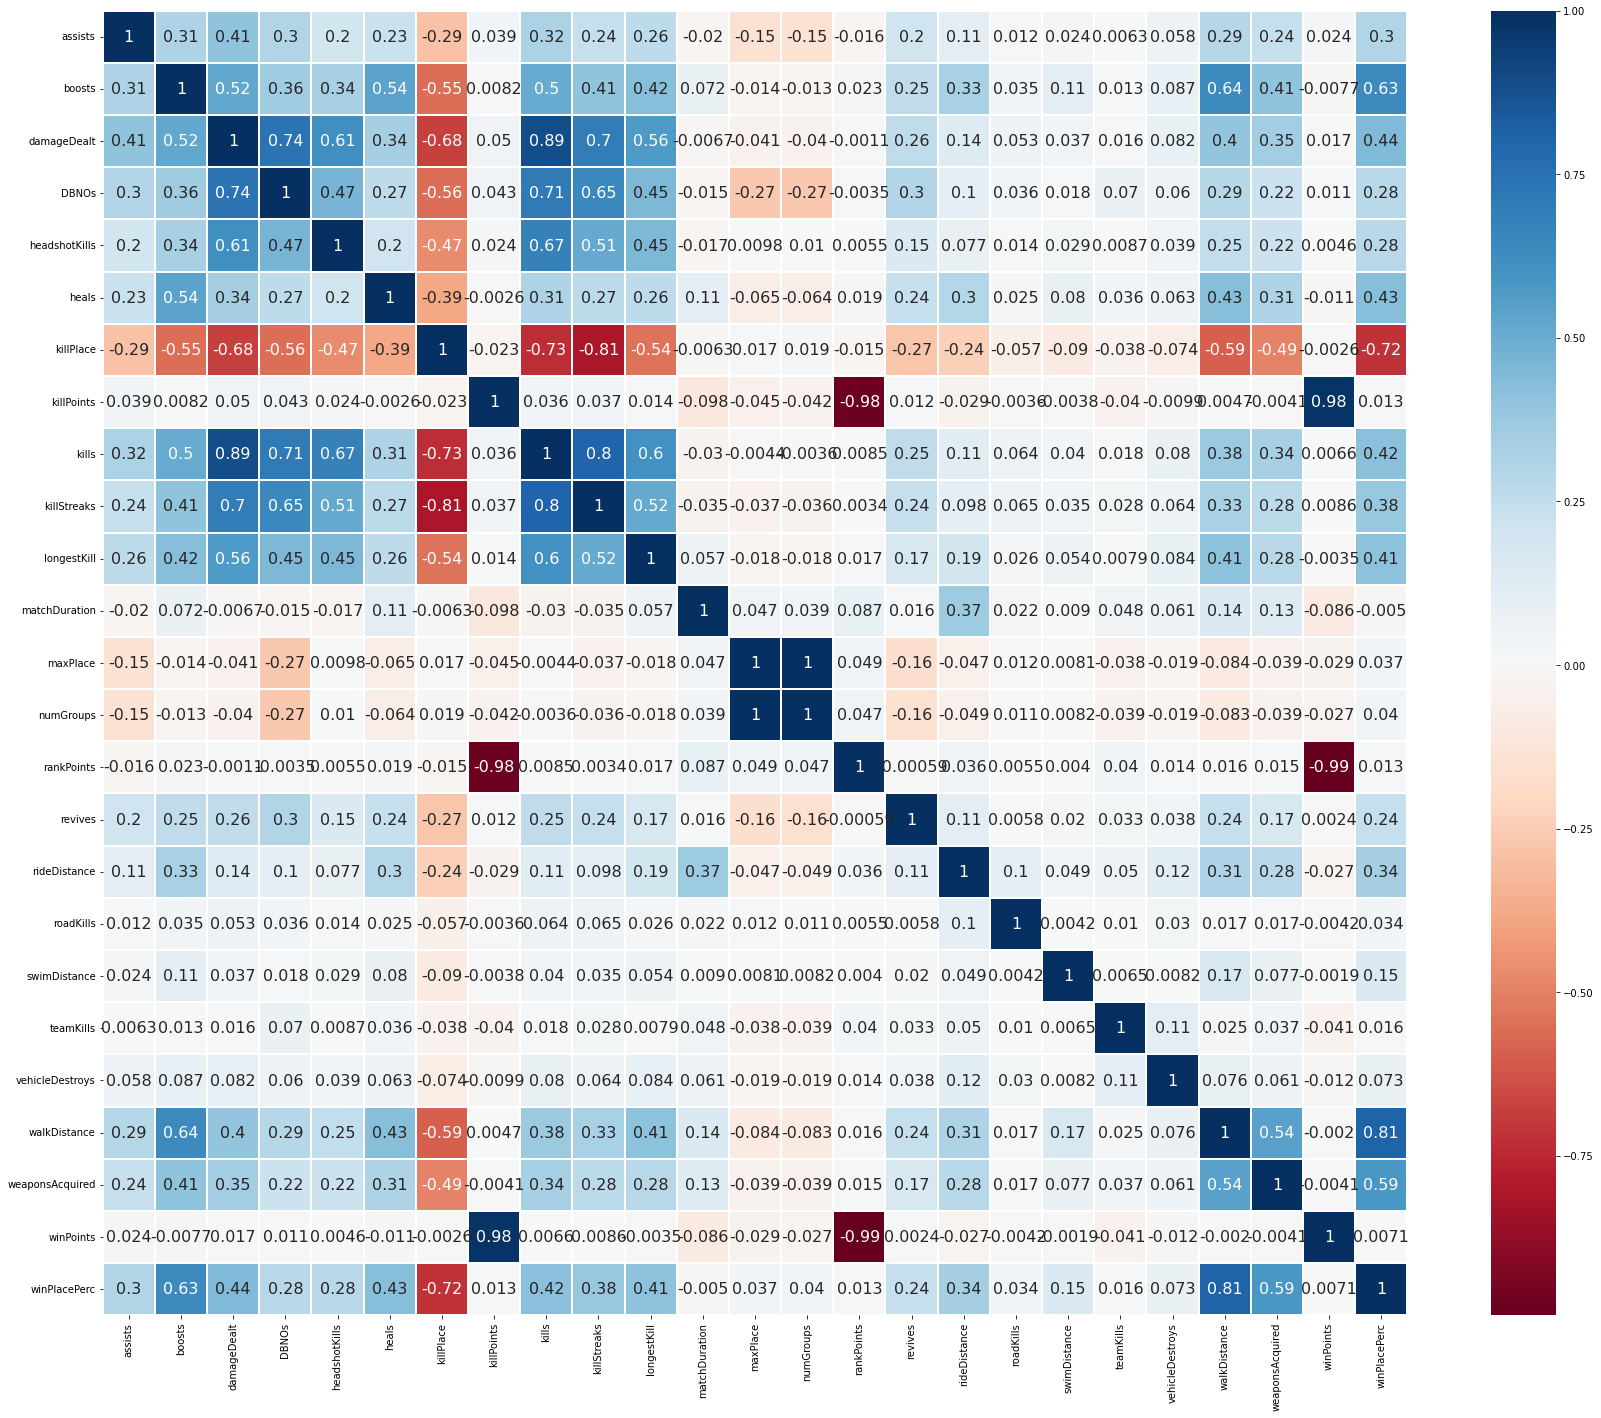

In [7]:
f,ax = plt.subplots(figsize=(30, 24))
colormap = plt.cm.RdBu
sns.heatmap(df_train.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})
plt.show()

In [8]:
# ride distance가 0일 때 roadkill이 있는 경우
df_train[(df_train['roadKills'] != 0) & (df_train['matchType'] != 4) & (df_train['rideDistance'] == 0.0000)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
671,209314d1a20b48,72a26f1ded95d6,7abce2d2ca9e49,1,1,334.8,4,0,1,17,1187,2,1,50.98,1714,squad-fpp,28,28,-1,0,0.0,1,0.00,0,0,838.0,6,1533,0.3704
36713,ed7575c25f2a5e,9be59a8d7ae94b,6c5c240ed3e339,2,5,298.9,3,0,6,12,1378,2,1,15.09,1870,duo,50,49,-1,1,0.0,1,0.00,0,0,3054.0,4,1509,0.8980
40347,b5f8da95af493f,1a2f5a68a2720c,ae50bb56b6da4e,0,0,169.3,1,0,0,39,0,1,1,14.42,1871,duo-fpp,46,44,1453,0,0.0,1,0.00,0,0,148.6,1,0,0.1333
43773,77178fffc09d09,86fd3da1738c43,620f0ea9a8c997,0,0,100.0,2,0,0,31,0,1,1,64.06,1351,squad-fpp,28,24,1486,1,0.0,1,0.00,1,0,696.0,3,0,0.3704
80830,51031404432d94,887f867c409234,96d18e663a6044,1,2,370.1,3,0,0,3,1054,5,2,68.35,1436,squad-fpp,27,27,-1,1,0.0,1,0.00,0,0,1009.0,4,1488,0.5385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439317,9b94dc10a38d62,a5fca46d7e7bac,8e07aac173da31,1,7,158.3,2,0,7,6,1269,3,1,44.11,1443,squad-fpp,32,32,-1,0,0.0,1,54.94,0,0,3713.0,4,1451,0.9677
3447245,b8290376274066,000b8720f4f5e9,c5714021749f4e,0,0,188.4,1,1,0,20,1193,2,2,15.93,1952,duo-fpp,46,44,-1,1,0.0,1,0.00,0,0,741.3,5,1412,0.3556
3454166,f38066d62ecfe5,6c41b0babb425e,afdf8d0834b1b9,0,0,185.6,1,0,0,42,0,1,1,65.78,1889,squad,27,25,1497,0,0.0,1,0.00,0,0,583.6,3,0,0.0769
3493695,91c97037c65d64,079d2cac7a16e1,8c1df7ee2f1198,0,2,156.9,1,1,2,21,0,2,1,18.82,1867,squad,29,28,1506,0,0.0,1,0.00,0,0,225.4,3,0,0.1786


In [9]:
# damagedealt가 0일 때 kill이 있는 경우
df_train[(df_train['kills'] != 0) & (df_train['damageDealt'] == 0) & (df_train['matchType'] != 4)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
733,1483b507bf43be,e468ae00a05134,19b3a8232074e5,1,0,0.0,0,0,1,37,1523,1,1,10.600,1347,squad-fpp,28,28,-1,0,0.0,0,0.0,0,0,231.10,2,1443,0.2963
773,0da074947acace,780051d11688f1,56b36999cfe3ee,0,0,0.0,0,0,0,39,1058,1,1,8.493,1391,squad,27,25,-1,0,0.0,0,0.0,0,0,62.34,2,1474,0.1923
1954,c63b184658a1a3,3dc6e06ab727eb,e26d9b4f6dfdf1,0,0,0.0,0,0,0,26,0,1,1,16.110,1382,squad,30,29,1496,0,0.0,0,0.0,1,0,1514.00,3,0,0.5517
2273,751d4916e02c7c,f1d428a4b98ba1,5ae3a69bef506e,0,0,0.0,0,1,0,28,0,1,1,0.000,1828,squad,27,27,1473,1,2214.0,0,0.0,0,0,914.80,5,0,0.5769
3789,25fb111beaf816,bdc2e0705640fb,219ed623862ed4,0,0,0.0,0,0,0,30,1040,1,1,113.200,1258,squad-fpp,27,27,-1,0,0.0,0,0.0,0,0,1723.00,7,1508,0.4615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516984,f30d2bdb2694bb,b24cc2d301b0b4,eddc7e9736e506,0,0,0.0,0,0,0,24,0,1,1,43.050,1339,squad-fpp,28,26,1500,0,0.0,0,135.0,0,0,1667.00,4,0,0.9630
3517768,09f0e19baacdb9,66b5af9fbd9540,1f7460f60f8645,0,0,0.0,0,0,0,37,1093,1,1,34.900,1444,squad,28,28,-1,0,0.0,0,0.0,0,0,31.67,2,1536,0.2963
3518065,2b0f82148db808,aa9a1d8659d27d,a830228514f1a5,0,0,0.0,0,0,0,42,0,1,1,61.010,1371,duo-fpp,49,49,1508,0,0.0,0,0.0,0,0,123.40,2,0,0.3542
3518109,532b9428583e93,afcf2b32044608,dfd7327dc91394,0,0,0.0,0,0,0,29,0,1,1,24.630,1360,squad,27,25,1418,1,0.0,0,0.0,0,0,335.20,3,0,0.2692


In [10]:
df_train.loc[(df_train['matchDuration'] > 0) & (df_train['matchId'] == 'a10357fd1a4a91'), ['matchId','matchDuration']]

,matchId,matchDuration


In [11]:
temp = df_train.drop(columns = ['Id', 'groupId', 'matchId', 'killPlace',\
    'matchType','winPlacePerc'])

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(temp.values, idx) for idx in range(temp.shape[1])],
    "features": temp.columns,
})

,VIF Factor,features
0,1.490934,assists
1,3.291761,boosts
2,9.666826,damageDealt
3,3.745847,DBNOs
4,2.125701,headshotKills
5,1.879973,heals
6,53.059419,killPoints
7,10.926687,kills
8,4.750018,killStreaks
9,2.074055,longestKill


In [14]:
import numpy as np

def reduce_mem_usage(df): # Function that reduce memory usage
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """


    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

def rm_MissingValue(df): # Remove missing values
    new_df = df.dropna(axis=0).copy()
    return new_df

In [15]:
# Feature Engineering
import pandas as pd
import numpy as np

# number of team players
def team_player(df):
    df['team_player']=df.groupId.map(df.groupId.value_counts())
    return df['team_player']

# total number of players
def player(df):
    df['player']=df.matchId.map(df.matchId.value_counts())
    return df['player']

# total travel distance
def total_distance(df):
    df['total_distance']=df['rideDistance']+df['swimDistance']+df['walkDistance']
    return df['total_distance']
  
def scaling(df, scaler, col_list): # Select scaler and columns to scale
    scaler = scaler
    temp = scaler.fit_transform(df.loc[:, col_list])
    for i in range(len(col_list)):
        df[col_list[i]] = temp[:,i]
    return df

# Place columns (list ranks)
def columns_place(list, X, df):
    for i in list:
        X[i + 'Place'] = df.groupby('matchId')[i].rank(method='max', ascending = False)
    
    return X

# matchType classification
def matchType_classify(df):
    def classify(x):
        if 'flare' in x or 'crash' in x or 'normal' in x:
            return 'event'
        elif 'solo' in x:
            return 'solo'
        elif 'duo' in x:            
            return 'duo'
        else:
            return 'squad'
    
    new_df = df
    new_df['matchType'] = df['matchType'].apply(classify)
    return new_df

# matchType encoding
def matchType_encoding(df):
    df_OHE = pd.get_dummies(df, columns=['matchType'])
    return df_OHE


#Grouping according to group ID and substituting the average value of the column.
def columns_grouped_mean(list, X, df):   
    for i in list :
        X['group'+i] = df.groupby('groupId')[i].transform('mean')
        
    return X

def average_weaponsAcquired(df): #Number of weapons acquired per minute
    df['average_weaponsAcquired'] = df.weaponsAcquired / (df.matchDuration / 60)
    return df['average_weaponsAcquired']

def average_damage(df): # dildo per minute
    df['average_damage'] = df.damageDealt / (df.matchDuration / 60)
    return df['average_damage']

# Involvement in Kills per Heal+Boost
def healboost_per_kill(df):
    df['healboost_per_kill'] =(df['heals']+df['boosts'])/df['assists']+df['kills']
    return df['healboost_per_kill']

#distance per game
def dist_per_game(df):
    df['dist_per_game'] = df['total_distance']/df['matchDuration']
    return df['dist_per_game']
    
#Damage Ratio
def damage_ratio(df):
    df['damage_ratio'] = df['damageDealt']/df['assists']+df['kills']
    return df['damage_ratio']

# average rank
def ave_place(df):
    df['ave_maxplace'] = df['killPlace'] / df['maxPlace']
#     df['ave_maxplace'].fillna(0, inplace=True)
#     df['ave_maxplace'].replace(np.inf, 0, inplace=True)
    return df['ave_maxplace']

#steps per kill
def walk_kills(df):
    df['walk_kills'] = df['walkDistance'] / df['kills']
#     df['walk_kills'].fillna(0, inplace=True)
#     df['walk_kills'].replace(np.inf, 0, inplace=True)
    return df['walk_kills']
    
# Total help involvement = assist + number of ally respawns
def support(df):
    df['support'] = df['assists'] + df['revives']
    return df['support']

# solo average kill
def solo_avg_kill(df):
    df['solo_avg_kill'] = df['killPlace']/df['player']
    return df['solo_avg_kill']

In [16]:
from sklearn.metrics import mean_absolute_error

def training(model, X, y):
    reg = model
    reg.fit(X, y)
    pred_train = reg.predict(X)
    mae_train = mean_absolute_error(y, pred_train)
    return [mae_train ,reg]

In [17]:
#%%
import numpy as np
import pandas as pd
import pickle
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression   # 1. Linear Regression 
from sklearn.linear_model import Lasso              # 2. Lasso
from sklearn.linear_model import Ridge              # 3. Ridge
from xgboost.sklearn import XGBRegressor            # 4. XGBoost
from lightgbm.sklearn import LGBMRegressor          # 5. LightGBM
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# from src.FE import columns_place, columns_grouped_mean, matchType_classify, matchType_encoding, team_player,\
#     scaling, player, total_distance, average_weaponsAcquired, average_damage ,healboost_per_kill,dist_per_game,damage_ratio,ave_place,walk_kills,support,solo_avg_kill

# from src.load_data import load_data
# from src.preprocess import feature_drop, reduce_mem_usage, rm_MissingValue
# from src.model import training

## 1. Preprocessing.
# 데이터프레임 메모리 사용량 줄이기
train_prep = reduce_mem_usage(df_train)

# 결측치 처리
train_prep = rm_MissingValue(train_prep)

# feature selection
train_prep = train_prep.drop(columns = ['Id','matchId','groupId','killPlace',\
                                       'killPoints','numGroups','rankPoints',\
                                       'teamKills', 'winPoints'])

## 2. Feature engineering
train_FE = train_prep
X = train_FE.drop(columns=['winPlacePerc','matchType'])
X_matchType = train_FE.matchType
y = train_FE.winPlacePerc

# Create new feature
X['average_weaponsAcquired'] = average_weaponsAcquired(df_train)
X['average_damage'] = average_damage(df_train)

X['totalDistance'] = total_distance(df_train)
X['team_player'] = team_player(df_train)
X['player']= player(df_train)
X['headshotKillsPerc'] = df_train.headshotKills / df_train.kills
X['kills_per_distance'] = df_train.kills / X.totalDistance
X['knocked_per_distance'] = df_train.DBNOs / X.totalDistance
X['damage_per_distance'] = df_train.damageDealt / X.totalDistance
X['killStreaks_rate'] = df_train.killStreaks / df_train.kills
X = columns_place(['assists','damageDealt','DBNOs','headshotKills','longestKill'], X, df_train)
X = columns_grouped_mean(['kills', 'assists', 'killStreaks', 'walkDistance'], X, df_train)

X['healboost_per_kill'] = healboost_per_kill(df_train)
X['dist_per_game'] = dist_per_game(df_train)
X['damage_ratio'] = damage_ratio(df_train)
X['ave_place'] = ave_place(df_train)
X['walk_kills'] = walk_kills(df_train)
X['support'] = support(df_train)
X['solo_avg_kill'] = solo_avg_kill(df_train)

X = X.replace((np.inf, -np.inf, np.nan), 0)

# Normalization(scaling)
X_scaled = scaling(X, StandardScaler(), ['damageDealt','longestKill','walkDistance',\
                                       'swimDistance','rideDistance'])

# Categorical feature encoding
X = pd.concat([X_scaled, X_matchType], axis=1)
X_OHE = matchType_classify(X)
X = matchType_encoding(X_OHE)

## 3. Train
# Sampling
import random
df = pd.concat([X,y], axis=1)

def sampling(df,n):
    idx = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idx].copy()

n = len(df) // 5
df_sample = sampling(df, n)
X = df_sample.drop(columns = 'winPlacePerc')
y = df_sample.winPlacePerc

# Hyper-parameter tuning
mae, reg = training(LGBMRegressor(max_depth=0), X, y)

print("LGBMregressor      : %.4f" % mae)
print(reg)
print(X.columns)

LGBMregressor      : 0.0512
LGBMRegressor(max_depth=0)
Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace',
       'revives', 'rideDistance', 'roadKills', 'swimDistance',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'average_weaponsAcquired', 'average_damage', 'totalDistance',
       'team_player', 'player', 'headshotKillsPerc', 'kills_per_distance',
       'knocked_per_distance', 'damage_per_distance', 'killStreaks_rate',
       'assistsPlace', 'damageDealtPlace', 'DBNOsPlace', 'headshotKillsPlace',
       'longestKillPlace', 'groupkills', 'groupassists', 'groupkillStreaks',
       'groupwalkDistance', 'healboost_per_kill', 'dist_per_game',
       'damage_ratio', 'ave_place', 'walk_kills', 'support', 'solo_avg_kill',
       'matchType_duo', 'matchType_event', 'matchType_solo',
       'matchType_squad'],
      dtype='object')


In [18]:
## 1. Preprocessing.
# Reducing dataframe memory usage
test_prep = reduce_mem_usage(df_test)

print(len(test_prep.index))

# Missing value handling
# test_prep = rm_MissingValue(test_prep)

print(len(test_prep.index))

# feature selection
test_prep = test_prep.drop(columns = ['Id','matchId','groupId','killPlace',\
                                       'killPoints','numGroups','rankPoints',\
                                       'teamKills', 'winPoints'])

print(len(test_prep.index))

## 2. Feature engineering
test_FE = test_prep
X = test_FE.drop(columns='matchType')
X_matchType = test_FE.matchType
#y = test_FE.winPlacePerc

print(len(X.index))

# Create new feature
X['average_weaponsAcquired'] = average_weaponsAcquired(df_test)
X['average_damage'] = average_damage(df_test)

X['totalDistance'] = total_distance(df_test)
X['team_player'] = team_player(df_test)
X['player']= player(df_test)
X['headshotKillsPerc'] = df_test.headshotKills / df_test.kills
X['kills_per_distance'] = df_test.kills / X.totalDistance
X['knocked_per_distance'] = df_test.DBNOs / X.totalDistance
X['damage_per_distance'] = df_test.damageDealt / X.totalDistance
X['killStreaks_rate'] = df_test.killStreaks / df_test.kills
X = columns_place(['assists','damageDealt','DBNOs','headshotKills','longestKill'], X, df_test)
X = columns_grouped_mean(['kills', 'assists', 'killStreaks', 'walkDistance'], X, df_test)

print(len(X.index))

X['healboost_per_kill'] = healboost_per_kill(df_test)
X['dist_per_game'] = dist_per_game(df_test)
X['damage_ratio'] = damage_ratio(df_test)
X['ave_place'] = ave_place(df_test)
X['walk_kills'] = walk_kills(df_test)
X['support'] = support(df_test)
X['solo_avg_kill'] = solo_avg_kill(df_test)

X = X.replace((np.inf, -np.inf, np.nan), 0)

print(len(X.index))

# Normalization(scaling)
X_scaled = scaling(X, StandardScaler(), ['damageDealt','longestKill','walkDistance',\
                                       'swimDistance','rideDistance'])

# Categorical feature encoding
X = pd.concat([X_scaled, X_matchType], axis=1)
X_OHE = matchType_classify(X)
X_test = matchType_encoding(X_OHE)

## 3. test
# mae, reg = training(XGBRegressor(max_depth=15), X, y)
print(X_test.columns)

result = reg.predict(X_test)
print(X_test.columns)

927005
927005
927005
927005
927005
927005
Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace',
       'revives', 'rideDistance', 'roadKills', 'swimDistance',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'average_weaponsAcquired', 'average_damage', 'totalDistance',
       'team_player', 'player', 'headshotKillsPerc', 'kills_per_distance',
       'knocked_per_distance', 'damage_per_distance', 'killStreaks_rate',
       'assistsPlace', 'damageDealtPlace', 'DBNOsPlace', 'headshotKillsPlace',
       'longestKillPlace', 'groupkills', 'groupassists', 'groupkillStreaks',
       'groupwalkDistance', 'healboost_per_kill', 'dist_per_game',
       'damage_ratio', 'ave_place', 'walk_kills', 'support', 'solo_avg_kill',
       'matchType_duo', 'matchType_event', 'matchType_solo',
       'matchType_squad'],
      dtype='object')
Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 

In [19]:
submission['winPlacePerc'] = result
submission.to_csv('submission.csv', index=False)

In [20]:
submission

,Id,winPlacePerc
0,8f728ac82e0a3b,0.304212
1,b508541c84de09,0.929974
2,13657bf3d29442,0.300373
3,4c7ad07ed04ba4,0.656729
4,58a25fa8b2c31c,0.675189
...,...,...
927000,a230188dbd3cb3,0.652090
927001,2778a1c5fe1026,0.322698
927002,03ec7eb09ef7e8,0.131437
927003,25694fbf622ce6,0.882268
